# Importando as Bibliotecas utilizadas no projeto 

In [9]:
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt

# Auto remove do projeto

In [10]:
os.remove('acervocursos.db')if os.path.exists('acervocursos.db') else None

# Criando a conexão com o banco de dados

In [11]:
conexao = sqlite3.connect('acervocursos.db')

# Criando o cursor para percorrer as linhas com o banco de dados

In [12]:
cur = conexao.cursor()

# Criando a função para criar tabela de cursos

In [13]:
def create_table():
    cur.execute('create table cursos (id integer primary key not null, nome varchar(20), categoria varchar(20), professor varchar(20), valor real)')

# Criando a função de inserir registros na tabela de cursos

In [14]:
def sql_insert():
    novo_nome = input('Nome: ')
    nova_categoria = input('Categoria: ')
    novo_professores = input('Professor: ')
    novo_valor = float(input('Valor: '))
    cur.execute('insert into cursos(nome, categoria, professor, valor) values (?,?,?,?)',(novo_nome, nova_categoria, novo_professores, novo_valor))
    conexao.commit()

# Executando a função de criar tabela

In [15]:
create_table()

# Executando a função de inserir dados e cadastrando cursos na tela

In [16]:
for r in range(7):
    sql_insert()
    

Nome: MySql
Categoria: Banco de Dados
Professor: Nelio
Valor: 300
Nome: Java
Categoria: Programação
Professor: Gustavo
Valor: 200
Nome: Excel
Categoria: Pacote Office
Professor: Guga
Valor: 100
Nome: Python
Categoria: Programação
Professor: Lira
Valor: 250
Nome: Postgres
Categoria: Banco de Dados
Professor: Alon
Valor: 130
Nome: Word
Categoria: Pacote Office
Professor: Alfredo
Valor: 80
Nome: Automação
Categoria: Programação
Professor: Lira
Valor: 400


# Convertendo a tabela cursos para um DataFrame e modificando o nome da coluna

In [17]:
cursos_df = pd.read_sql('Select * from cursos', conexao)
cursos_df = cursos_df.rename(columns={'id': 'id_curso'})

# Exibindo a tabela cursos na tela

In [18]:
cursos_df

,id_curso,nome,categoria,professor,valor
0,1,MySql,Banco de Dados,Nelio,300.0
1,2,Java,Programação,Gustavo,200.0
2,3,Excel,Pacote Office,Guga,100.0
3,4,Python,Programação,Lira,250.0
4,5,Postgres,Banco de Dados,Alon,130.0
5,6,Word,Pacote Office,Alfredo,80.0
6,7,Automação,Programação,Lira,400.0


# Modificando o index da tabela 

In [19]:
cursos_df = cursos_df.set_index('id_curso')
cursos_df

,nome,categoria,professor,valor
id_curso,,,,
1,MySql,Banco de Dados,Nelio,300.0
2,Java,Programação,Gustavo,200.0
3,Excel,Pacote Office,Guga,100.0
4,Python,Programação,Lira,250.0
5,Postgres,Banco de Dados,Alon,130.0
6,Word,Pacote Office,Alfredo,80.0
7,Automação,Programação,Lira,400.0


# Criando a função do gráfico com os valores e nomes de cada curso

In [24]:
def grafico():
    cur.execute('select nome, valor from cursos')
    nomes = []
    valores = []
    dados = cur.fetchall()
    for linha in dados:
        nomes.append(linha[0])
        valores.append(linha[1])
    plt.bar(nomes, valores)    
    plt.show()
    

# Exibindo o gráfico na tela

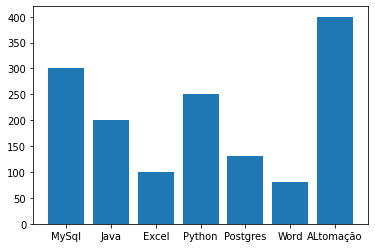

In [29]:
grafico()